# 线性回归

很多讲机器学习的书或者课程都从线性回归 (linear regression) 开始, 我们也不例外. 以线性回归为起点, 可以很自然的过渡到逻辑回归 (logictic regression), 而多元逻辑回归又可以看作最为简单的神经网络 (neural network).

线性回归通过一个线性函数来拟合给定的数据点 $x$ 和目标值 $y$:
$$
y = w_1 \cdot x_1 + w_2 \cdot x_2 + ... + w_N \cdot x_N
$$
其中 $w = (w_1, w_2, ..., w_N)^T$ 是待确定的参数.

既然是做拟合就会有多个数据点, 假设有 $D$ 对数据点和目标值, 那么就可以得到如下线性方程组:
\begin{align}
y_1 &= w_{1} \cdot x_{11} + w_{2} \cdot x_{12} + \ldots + w_{N} \cdot x_{1N} \\
y_2 &= w_{1} \cdot x_{21} + w_{2} \cdot x_{22} + \ldots + w_{N} \cdot x_{2N} \\
\ldots \\
y_D &= w_{1} \cdot x_{D1} + w_{2} \cdot x_{D2} + \ldots + w_{N} \cdot x_{DN}
\end{align}
将 $y_i$ 和 $x_{ij}$ 分别用向量和矩阵表示为:
$$
y = \begin{bmatrix}y_1 \\ y_2 \\ \vdots \\ y_D \end{bmatrix}
$$
和
$$
X = \begin{bmatrix}
x_{11} & x_{12} & \ldots & x_{1N} \\
x_{21} & x_{22} & \ldots & x_{2N} \\
\vdots & \vdots & \ddots & \vdots \\
x_{D1} & x_{D2} & \ldots & x_{DN} \\
\end{bmatrix}
$$
上面的线性方程组就可以写作 $y = Xw$.

如果 $D \leq N$, $w$ 的值可以通过求解上述线性方程组来确定. 当 $D = N$ 并且 $X$ 可逆, 方程组有唯一解 $w = X^{-1}y$. 但是在大部分情况下 $D \gg N$, 也就是说方程的个数一般远远大于变量的个数, 此时方程组一般没有解. 下面我们将从多个方面讨论如何在这种情况下确定 $w$ 的值.

为了方便接下来的讨论, 我们用 $x_{*j}$ 表示矩阵 $X$ 的第 $j$ 列, 用 $x_{i*}$ 表示矩阵 $X$ 的第 $i$ 行:
$$
X = \begin{bmatrix}x_{*1} & x_{*2} & \ldots & x_{*N} \end{bmatrix}
= \begin{bmatrix}x_{1*} \\ x_{2*} \\ \vdots \\ x_{D*} \end{bmatrix}
$$

## 最小二乘法

既然没有办法找到一个 $w$ 使得预测值 $Xw$ 等于目标值 $y$, 那么 $y$ 和 $Xw$ 必然有一个偏差 $\epsilon = y - Xw$. 我们希望偏差尽可能的小. "小"是一个模糊的概念, 所以需要进一步考虑如何量化 $Wx$ 和 $y$ 的偏差. 一个显而易见的度量方法就是 $\epsilon$ 各部分的绝对值的和 $\sum_{i=1}^D {\left| \epsilon_i \right|}$. 这个和越小意味着预测值和目标值越接近. 于是可以令 $w$ 等于如下极值问题的解:
$$\min_{w \in R^N} \sum_{i=1}^D {\left| \epsilon_i \right|} $$
即
$$\min_{w \in R^N} \sum_{i=1}^D {\left| y_i - x_{i*} w \right|} $$
由于函数 $f(x) = \left| x \right|$ 在原点附近不可导, 求解上面的极值问题并不容易.

可以稍作改变, 使用残差平方和 $RSS(w) = \sum_{i=1}^D {\left( y_i - x_{i*} w \right)^2}$ 来度量预测值和目标值的偏差, 从而得到一个更容易求解的问题:
$$\min_{w \in R^N} \sum_{i=1}^D {\left( y_i - x_{i*} w \right)^2} $$
这就是我们熟知的最小二乘法. 目标函数 $G(w) = RSS(w)$ 处处可导, 在取得最小值的时候, 目标函数的梯度等于零 $\frac{dG(w)}{dw} = 0$.

我们先一步步求偏导:
\begin{align}
\frac{dG(w)}{dw_j} &= \frac{\sum_{i=1}^D {\left( y_i - x_{i*} w \right)^2}}{dw_j} \\
&= \frac{\sum_{i=1}^D {\left( y_i - \sum_{k=1}^N {x_{ik}} w_k \right)^2}}{dw_j} \\
&= 2 \cdot \sum_{i=1}^D {\left( y_i - \sum_{k=1}^N {x_{ik}} w_k \right) \cdot \left( - x_{ij} \right) }
\end{align}
注意到上述公式中的内外两个求和项都是向量点积, 所以可以重新写作向量形式:
\begin{align}
\frac{dG(w)}{dw_j} &= 2 \cdot \sum_{i=1}^D {\left( y_i - x_{i*} w \right) \cdot \left( - x_{ij} \right) } \\
&= -2 \cdot x_{*j}^T \cdot \left( y - X w \right)
\end{align}

梯度的表达式就是所有偏导堆积在一列:
$$
\frac{dG(w)}{dw} = \begin{bmatrix} \frac{dG(w)}{dw_1} \\ \frac{dG(w)}{dw_2} \\ \vdots \\ \frac{dG(w)}{dw_D} \end{bmatrix}
= -2 \cdot X^T \left( y - X w \right)
$$
令 $\frac{dG(w)}{dw} = 0$ 可以得到:
\begin{align}
-2 \cdot X^T \left( y - X w \right) &= 0 \\
X^T \left( y - X w \right) &= 0 \\
X^T y - X^T X w &= 0 \\
X^T X w &= X^T y
\end{align}
我们将上述方程称作正则方程 (noraml equation). 令 $A = X^T X$, $b = X^T y$, 正则方程可以写作 $Aw = b$. 注意到 $A$ 是一个 $N \times N$ 的矩阵, $b$ 是一个长度为 $N$ 的列向量, 他们的大小只与参数的个数 $N$ 有关, 而与数据点的个数无关.

为了得到 $w$ 的值我们又回到求解线性方程组的问题. 接下来我们暂不讨论正则方程的解, 而先来介绍正则方程的几何解释.

### 正则方程的几何解释

首先来看一个简单的一元线性回归问题:
$$ y = \beta x $$
对于这个问题我们有如下两组观测值:

|   x  |   y  |
|------|------|
|   1  |  2   |
|   2  |  5   |

如果要将上述数据可视化, 我们一般会将每一组数据点 (即表格中的每一行) 作为二维平面上的一个点. 那么线性回归就是要找一条尽可能靠近这些点的直线. 注意到的直线 $y = \beta x$ 一定经过原点, 如下图所示.

Text(2,5,'(2, 5)')

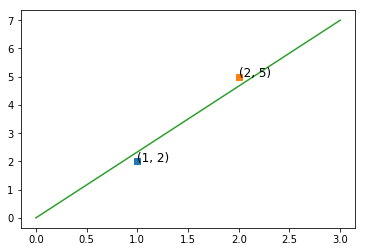

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

p1 = (1, 2)
p2 = (2, 5)
line = zip(np.array([0, 0]), np.array([3, 7]))
plt.plot(*p1, 's', *p2, 's', *line)
plt.text(*p1, "(%d, %d)" % (*p1,), fontsize='large')
plt.text(*p2, "(%d, %d)" % (*p2,), fontsize='large')

上图能给我们一些直观的感受, 比如这些点到直线的距离. 但是我们很难"看"出哪条直线最靠近这些点.

从另一个角度来看, 我们可以去观察表格中的每一列, 这样做能带来更深刻的认识. $y = (2, 5)^T$ 这一列代表一个固定的点, $\beta x$ 代表一条直线上的任意一个点 $p = (\beta, 2 \beta)^T$. 而他们的差 $\epsilon = y - \beta x$ 代表一条连接 $y$ 和 $p$ 的线段. 实际上 $\epsilon$ 就是最小二乘法中定义的偏差, 所以最小二乘法做的就是通过移动 $p$ 点 (即选取 $\beta$ 的值), 让 $y$ 和 $p$ 尽可能的靠近.

将他们画在二维平面上就是:

In [2]:
def plot_point_and_line(beta):
    y = np.array([2, 5])
    x = np.array([1, 2])
    z = np.array([0, 0])
    p = beta * x
    y2p = zip(y, p)
    line = zip(z, x * 4)
    plt.plot(*y, 'rs', *p, 'bo', *line, 'k-', *y2p, 'g-')
    plt.text(*y, '    y', fontsize='large')
    plt.text(*p, '    p', fontsize='large')

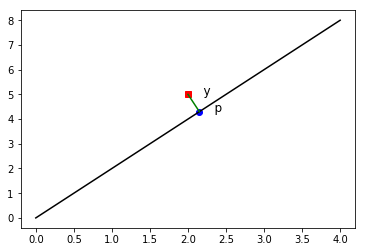

In [3]:
plot_point_and_line(2.15)

In [4]:
from ipywidgets import interactive
interactive(plot_point_and_line, beta=(0, 4, 0.05))

interactive(children=(FloatSlider(value=2.0, description='beta', max=4.0, step=0.05), Output()), _dom_classes=…

显然当代表偏差 $\epsilon$ 的绿色线段和黑色直线垂直的时候, 绿色线段的长度最小. 绿色线段和黑色直线垂直意味着 $x$ 和 $\epsilon$ 的点积为零:
$$x^T(y - \beta x) = 0$$
上述方程就是一元线性回归的正则方程.

如果是多元线性回归, $X$ 的所有列可以生成一个向量空间, $Xw$ 便是这个向量空间中的一个向量. 我们希望 $Xw$ 尽可能的靠近 $y$, 那么 $Xw$ 就应该是 $y$ 在该向量空间上的投影. 也就是说 $y - Xw$ 垂直于该向量空间中的任意一个向量, 它自然也和 $X$ 的列向量垂直, 所以 $y - Xw$ 和 $X$ 的列向量的点积都为零:
$$X^T \left( y - Xw \right) = 0$$
这正是通过最小二乘法得到的正则方程.

### 求解正则方程

由于 $X^T X$ 是一个 $N \times N$ 的方阵, 所以求解正则方程 $X^T X w = X^T y$ 的关键在于 $X^T X$ 是否可逆. 如果可逆, 方程的解就是 $w = \left( X^T X \right)^{-1} X^T y$. 我们接下来证明只要 $X$ 的列向量是线性独立的, $X^T X$ 就可逆.

为了证明上述论断, 需要利用如下命题:
> $A^T A$ 和 $A$ 有着相同的 nullspace.

矩阵 $A$ 的 nullspace 就是方程 $Ax = 0$ 的所有解组成的向量空间. 显然如果 $Ax = 0$ 必有 $A^T A x = 0$. 也就是说 $A$ 的 nullspace 中的向量也在 $A^T A$ 的 nullspace 中. 另一方面, 如果 $A^T A x = 0$, 可做如下推导:
$$ A^T A x = 0 \rightarrow x^T A^T A x = 0 \rightarrow \|Ax\|^2 = 0 \rightarrow Ax = 0$$
于是我们证明了这两个 nullspace 是一样的.

如果 $X$ 的列向量是线性独立的, 那么 $X$ 的 nullspace 就只包含 0. 应用上述命题, $X^T X$ 的 nullspace 也只包含 0. 也就是说 $X^T X$ 的列向量是线性独立的, 于是 $X^T X$ 可逆.

如果 $X$ 的列向量不是线性独立的该怎么办? $X$ 的每一列都是针对某一特征的一系列观测值. $X$ 的列向量不是线性独立的, 意味着其中一个特征的观测值完全可以通过对其他特征的观测值进行线性组合得到. 问题出在选取了高度相关的特征上, 可以尝试剔除掉冗余的特征来解决这个问题.

## 极大似然估计

一般来说对于一个统计量, 存在着多种估计方法. 极大似然法是估计线性回归参数的另一种方法. 使用极大似然法需要对目标值 $y_i$ 的概率分布做出假设. 在线性回归中我们假设 $y_i$ 都是相互独立的, 并且符合正态分布 $y_i \sim \mathcal{N}(x_{i*} w, \sigma^{2})$. 该分布的密度函数为:
$$
\varphi(y) = \frac{1}{\sigma\sqrt{2\pi}} \exp \left( - \frac{\left( y - x_{i*} w \right)^2}{2 \sigma^2} \right)
$$

那么一组数据 $(x_i, y_i)$ 的似然函数就是:
\begin{align}
L(w) &= \prod_{i=0}^D {L \left(w | x_i, y_i \right)} \\
&= \prod_{i=0}^D {\varphi(y_i)}
\end{align}
$w$ 的极大似然估计就是如下最大值问题的解:
$$\max_{w} L(w)$$

因为 $\log(x)$ 是单调递增函数, 所以为了计算方便, 可以最大化对数似然函数:
$$\max_{w} LL(w)$$
其中
\begin{align}
LL(w) &= \log L(w) \\
&= \log{ \prod_{i=0}^D {\varphi(y_i)} } \\
&= \sum_{i=0}^D \log {\varphi(y_i)} \\
&= \sum_{i=0}^D { \left( \log \left( \frac{1}{\sigma\sqrt{2\pi}} \right) - \frac{\left( y - x_{i*} w \right)^2}{2 \sigma^2} \right) } \\
&= D \log \left( \frac{1}{\sigma\sqrt{2\pi}} \right) - \frac{1}{2 \sigma^2} \sum_{i=0}^D { \left( y - x_{i*} w \right)^2 } \\
\end{align}

上述函数的第一项是常数, 在求解最大值的时候可以将其舍去. 第二项前面的常数 $\frac{1}{2 \sigma^2}$ 同样不会改变最大值问题的解. 于是简化为求解如下最大值问题:
$$\max_w -\sum_{i=0}^D { \left( y - x_{i*} w \right)^2}$$
即
$$\min_w \sum_{i=0}^D { \left( y - x_{i*} w \right)^2}$$
这正是最小二乘法对应的极值问题.

参数 $w$ 的最大似然估计和通过最小二乘法得到的值一样, 这是正态分布概率密度函数的表达式决定的. 如果换一个概率分布, 使用两种方法得到的估计值就可能不同. 在机器学习中, LL(w) 和 RSS(w) 被叫做损失函数, 这两个损失函数取极值的时候 $w$ 的值恰巧相同.

## 梯度下降法

如果线性回归需要解决的问题规模较小, 可以直接求解正则方程来得到参数值. 但是如果矩阵 $X$ 的规模很大, 直接计算 $\left( X^T X \right)^{-1}$ 会很困难. 另一方面, 很多机器学习模型中的极值问题 (例如多层神经网络的训练) 没有一个像正则方程这样的解析解, 那就需要使用数值计算方式来求解.

一般来说, 为了求解一个复杂的目标函数的极值, 我们会用一个简单的函数去近似这个目标函数. 近似函数一般会在一个较小的区域内和原目标函数极为吻合, 于是目标函数的极值问题就被转化为近似函数的极值问题. 然后通过多次迭代, 就能一步步逼近目标函数的解. 接下来介绍的梯度下降法就是这样一个简单有效的方法.

### 泰勒级数

泰勒级数可以看作是对一个函数的近似. 假设函数 $f(x)$ 的任意阶导数都存在, 那么它在点 $x_0$ 处的泰勒级数可以写作:
$$ f(x) = f(x_0) + (x - x_0)^T \nabla_x f(x_0) + (x - x_0)^T \nabla_x^2f(x_0) (x - x_0) + \cdots $$

我们自然希望得到一个简单的近似, 所以一般的数值优化算法最多考虑二阶近似:
$$ f(x) \approx f(x_0) + (x - x_0)^T \nabla_x f(x_0) + (x - x_0)^T \nabla_x^2f(x_0) (x - x_0)$$

有的时候二阶近似也并不容易, 因为 $\nabla_x^2f(x_0)$ 是一个矩阵 (即 Hessian 矩阵), 而得到这个矩阵需要花费大量的计算和存储资源. 于是就只剩下最简单的近似函数:
$$ f(x) \approx f(x_0) + (x - x_0)^T \nabla_x f(x_0)$$
上面的近似函数是线性的. 令 $p = x - x_0$, 剩下的问题就是如果选择 $p$.

### 最速下降梯度

实际上通过变化 $p$, 近似函数的值可以接近无限大或者无限小. 所以这里我们只关心 $p$ 的方向, 而不去关注它的"长度". 令 $p = \alpha d$, 其中 $\alpha$ 是一个实数, $d$ 是单位圆上的一个向量 (即 $\left\| d \right\| = 1$). 假如我们要求目标函数的最小值, 那么对于固定的 $\alpha$, 当 $d = \frac{-\nabla_x f(x_0)}{\left\| \nabla_x f(x_0) \right\|}$ 时, 近似函数的值最小. 这个 $d$ 就是最速下降梯度.

得到 $d$ 的值以后, 我们要接着考虑如果确定 $\alpha$ 的值. 显然这时 $\alpha$ 的值越大, 近似函数的值越小. 但是当 $\alpha$ 的值较大时, 近似函数的值和目标函数的值已经有很大偏差. 我们不如将
$$x = x_0 + p = x_0 + \alpha d = x_0 + \alpha \frac{-\nabla_x f(x_0)}{\left\| \nabla_x f(x_0) \right\|}$$
重新代入目标函数 $f(x)$, 即求如下极小值问题:
$$ \min_{\alpha \in R} f(x_0 + \alpha d) $$
也就是说以 $x_0$ 为起点, 沿着方向 $d = \frac{-\nabla_x f(x_0)}{\left\| \nabla_x f(x_0) \right\|}$ 找到一个点使得目标函数值最小.

在机器学习中 $f(x)$ 可能是一个非常复杂的表达式 (例如它可以代表一个神经网络的损失函数), 仅仅计算一次 $f(x)$ 也要消耗不少的计算资源. 无论通过何种搜索方法来得到最有解
$$ \alpha^* = \mathrm{arg\,min}_{\alpha \in R} f(x_0 + \alpha d) $$
都要对 $f(x)$ 进行多次计算. 这时我们不再寻求 $\alpha$ 的最优值, 只是将 $\alpha$ 固定在一个较小的值 (比如 $0.001$), 然后给它取一个好听的名字学习速率 (learning rate). 同时也舍去对收敛条件的检查, 只进行固定的 $K$ 次迭代, 那么我们得到如下方法:

* 令 $x_0$ 等于一个随机值. 
* 从 $k = 0$ 到 $K$ 做如下迭代:<br/>
    * $x_{k+1} = x_k - \alpha \nabla_x f(x_k)$

### 随机梯度下降法

上述讨论针对的是一般化的目标函数 $f(x)$, 如果充分利用目标函数的表达式的特点, 我们可以得到更加高效的方法. 例如最小二乘法的目标函数有这样的形式:
$$G(w) = \sum_{i=1}^D {g(w, x_i)}$$
其中 $g(w, x_i) = \left( y_i - x_{i*} w \right)^2$ 只依赖于第 $i$ 组数据点. $g(w, x_i)$ 可以看作是第 $i$ 组数据点对目标函数 $G(w)$ 的贡献, 而 $\nabla_w g(w, x_i)$ 就是其对目标函数梯度 $\nabla_w G(w)$ 的贡献.

虽然计算最小二乘法的 $\nabla_w G(w)$ 相对简单, 但是如果需要处理的是多层神经网络的损失函数, 并且数据集特别大, 计算 $\nabla_w G(w)$ 并进行多次迭代就需要耗费不小的计算资源. 这是因为每次迭代都要考虑到每一个数据点的贡献之后才能对 $w$ 的值进行一次更新. 观察最小二乘法目标函数的形式可以发现, 每个数据点对目标函数的贡献都是互相独立的, 所以可以只考虑部分数据点的贡献, 这样做能更加频繁的更新 $w$ 的值, 并且也减少了单次迭代的计算量. 

一个很极端的做法就是只去考虑一个数据点对 $\nabla_w G(w)$ 的贡献. 于是可以得到随机梯度下降法 (Stochastic gradient descent):

* 将 $D$ 个数据点进行随机混排 (random shuffle), 并令 $w_0$ 等于一个随机值.
* (外层循环) 初始化 $j = 0$, 从 $k = 0$ 到 $K$ 做如下迭代:
    * (内层循环) 从 $i = 1$ 到 $D$ 做如下迭代:
        * $w_{j+1} = w_j - \alpha \nabla_w g(w_{j}, x_i)$
        * $j = j + 1$

由于随机梯度下降法每次只考虑一个数据点, 它的实现很难充分利用现代 CPU 或者 GPU 较大的缓存. 这使得大量的时间耗费在将数据从内存移动到缓存的过程中, 而不是在真正的计算上. 一个折中的做法就是每次考虑一小批数据. 假设做 $K$ 次迭代, 每批考虑 $B$ 个数据点, 那么就得到分批的梯度下降法 (Mini-batch gradient descent):

* 将 $D$ 个数据点进行随机混排 (random shuffle), 并令 $w_0$ 等于一个随机值.
* (外层循环) 初始化 $j = 0$, 从 $k = 0$ 到 $K$ 做如下迭代:
    * (内层循环) 从 $i = 0$ 到 $\left \lfloor \frac{D}{B} \right \rfloor$ 做如下迭代:
        * $w_{j+1} = w_j - \alpha \sum_{h=i \cdot B + 1}^{(i + 1) \cdot B} {\nabla_w g(w_j, x_h)}$
        * $j = j + 1$


### 梯度下降法的实现

最后我们通过一个简单的线性回归问题来介绍 Mini-batch gradient descent 的实现. 首先我们定义如下随机变量, 并生成一些数据:
$$ y = 2 x_1 - 3.4 x_2 + 4.2 + \varepsilon $$
其中 $\varepsilon \sim \mathcal{N}(0, 1)$.

In [5]:
def real_fn(X):
    x1, x2 = X[:, 0], X[:, 1]
    return 2 * x1 - 3.4 * x2 + 4.2

In [6]:
num_inputs = 2
num_outputs = 1
num_examples = 10000

In [7]:
x = np.random.randn(num_examples, num_inputs)
epsilon = np.random.randn(num_examples)
y = real_fn(x) + epsilon

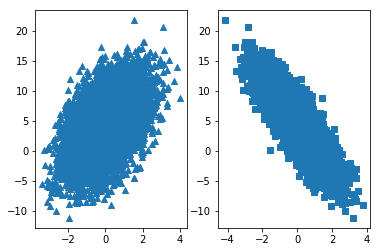

In [21]:
plt.figure()
plt.subplot(121)
plt.scatter(x[:, 0], y, marker='^')
plt.subplot(122)
plt.scatter(x[:, 1], y, marker='s')

接下来定义最小二乘法的目标函数:

In [9]:
def linear_regression(x, w, b):
    return np.dot(x, np.squeeze(w)) + b

In [22]:
def square_loss(yhat, y):
    return np.mean((yhat - y) ** 2)

In [ ]:
接下来定义计算梯度的函数

In [11]:
def gradient(w, b, x, y):
    # obj func sum(G(w, b)) / N
    #   where G(w, b) = [(wx + b) - y].^2
    # DG(w, b) / dw
    #   = 2 * (wx + b - y) * D(wx + b - y) / dw
    #   = 2 * (wx + b - y) * x
    # DG(w, b) / db
    #   = 2 * (wx + b - y) * D(wx + b - y) / db
    #   = 2 * (wx + b - y)
    z = 2 * (np.dot(x, np.squeeze(w)) + b - y)
    #print([z.shape, x.shape, np.squeeze(w).shape])
    return np.mean(z[:, np.newaxis] * x, axis=0), np.mean(z)

In [23]:
def sgd_update(w, b, x, y, rate):
    grad_w, grad_b = gradient(w, b, x, y)
#     print(grad_w)
#     print(grad_b)
    w[:] = w - rate * grad_w[:, np.newaxis]
    b[:] = b - rate * grad_b
    return w, b

对数据进行随机混排:

In [26]:
z = np.array(list(zip(x, y)))
np.random.shuffle(z)

每 4 个数据点组成一个 mini-batch:

In [27]:
batch_size = 4
num_batches = num_examples / batch_size
batches = np.array_split(z, num_batches)
num_batches, batches[0]

(2500.0, array([[array([-0.98073966, -0.34296573]), 3.9405862829257776],
        [array([-0.3536704 ,  0.00202796]), 3.9991898889843913],
        [array([ 0.44076704, -1.02609517]), 7.825992723570801],
        [array([ 0.82398357, -0.81048981]), 9.393440358211645]],
       dtype=object))

进行 10 次迭代, 并且设置 learning rate:

In [28]:
epochs = 10
learning_rate = .0001

初始化 `w` 和 `b` 为随机值:

In [29]:
w = np.random.randn(num_inputs, num_outputs)
b = np.random.randn(num_outputs)

开始迭代:

In [18]:
for e in range(epochs):
    cumulative_loss = 0
    for batch in batches:
        bx, by = zip(*batch)
        bx, by = np.array(bx), np.array(by)
        yhat = linear_regression(bx, w, b)
        loss = square_loss(yhat, by)
        cumulative_loss += loss
        sgd_update(w, b, bx, by, learning_rate)
    print(cumulative_loss / num_batches)

9.353242041768478
4.024271262486476
2.093512634559278
1.3938861654518122
1.1403194640782508
1.048388326188577
1.015040194238321
1.0029321337857091
0.9985293334949733
0.9969243995009476


In [19]:
w

array([[ 2.00322516],
       [-3.39219985]])

In [20]:
b

array([4.16351293])